<h1 style="text-align: center;" >
Experiment 6 <br> 
The Laws  <br> 
Stefan-Boltzmann Law(Radiant flux)
</h1> 

In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.stats import linregress
'''plotting necessities'''
%matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use("bmh")
'''Some constants'''
h = 6.6268e-34 #planck's
C = 3e8 #speed of light
k = 1.38e-23 #boltzmann
 

In [25]:
#beta with k in eV
def beta(T):
    return 1/(8.61e-5*T)

In [72]:
def getZ(evals,g):
    termsZ = np.vectorize(lambda T: g*np.exp(-1*beta(T)*evals))
    Z = np.vectorize(lambda T: np.sum(termsZ(T)))
    P = np.vectorize(lambda T: termsZ(T)/Z(T),signature='()->(n)')
    U = np.vectorize(lambda T: np.sum(P(T)*evals))
    S = np.vectorize(lambda T: 8.61e-5*(1+np.log(Z(T)))+ U(T)/T)
    F = np.vectorize(lambda T: -8.61e-5*T*np.log(Z(T)))
    return Z,P,U,S,F


[0.00000000e+00 3.69923990e-50 1.92333545e-25 3.33198539e-17
 4.38558180e-13 1.29903761e-10 5.77233340e-09 8.67563265e-08
 6.62236699e-07 3.21785284e-06 1.13974019e-05 3.20758160e-05
 7.59700963e-05 1.57571741e-04 2.94457534e-04 5.06198247e-04
 8.13117805e-04 1.23510793e-03 1.79062819e-03 2.49595146e-03
 3.36466380e-03 4.40739564e-03 5.63174605e-03 7.04235675e-03
 8.64109420e-03 1.04273036e-02 1.23981045e-02 1.45487052e-02
 1.68727172e-02 1.93624589e-02 2.20092383e-02 2.48036113e-02
 2.77356116e-02 3.07949526e-02 3.39712003e-02 3.72539203e-02
 4.06327999e-02 4.40977467e-02 4.76389683e-02 5.12470335e-02
 5.49129179e-02 5.86280368e-02 6.23842663e-02 6.61739552e-02
 6.99899293e-02 7.38254887e-02 7.76744005e-02 8.15308871e-02
 8.53896122e-02 8.92456630e-02]


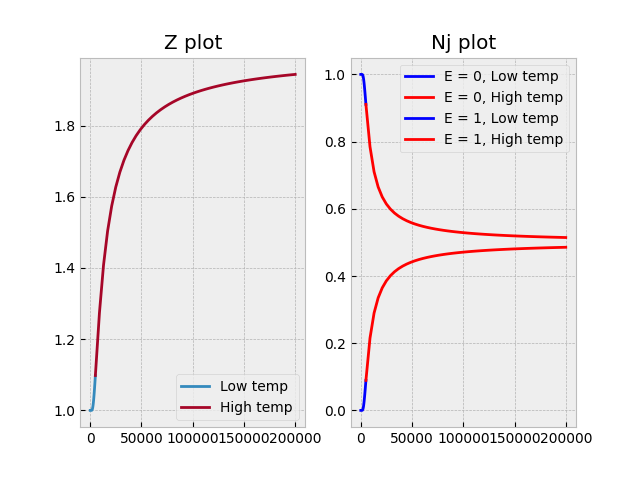

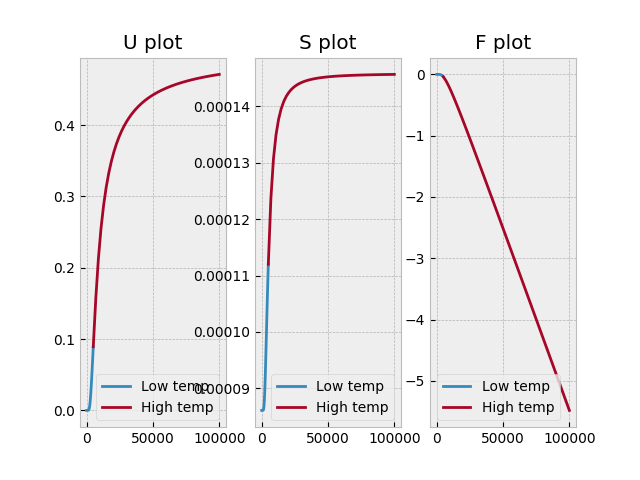

In [94]:
# Two level 0, epsilon
evals,g = np.array([0,1]),np.array([1,1])

Z,P,U,S,F = getZ(evals,g)

def plotUSF(U,S,F):
    T_spacelow = np.linspace(1e-5,5e3)
    T_spacehigh = np.linspace(5e3,1e5)
    Ulow = U(T_spacelow)
    Uhigh = U(T_spacehigh)
    print(Ulow)
    fig,(ax1,ax2,ax3) = plt.subplots(1,3)
    ax1.plot(T_spacelow,Ulow,label=f"Low temp" );
    ax1.plot(T_spacehigh,Uhigh,label=f"High temp")
    ax1.set_title("U plot")
    

    Slow = S(T_spacelow)
    Shigh = S(T_spacehigh)
    ax2.plot(T_spacelow,Slow,label=f"Low temp" );
    ax2.plot(T_spacehigh,Shigh,label=f"High temp")
    ax2.set_title("S plot")

    
    Flow = F(T_spacelow)
    Fhigh = F(T_spacehigh)
    ax3.plot(T_spacelow,Flow,label=f"Low temp" );
    ax3.plot(T_spacehigh,Fhigh,label=f"High temp")
    ax3.set_title("F plot")

    ax1.legend()
    ax2.legend()
    ax3.legend()


def plotZP(Z,P):
    T_spacelow = np.linspace(1e-5,5e3)
    T_spacehigh = np.linspace(5e3,2e5)
    Plow = P(T_spacelow).T 
    Phigh = P(T_spacehigh).T 
    n = Plow.shape[0]
    fig,(ax1,ax2) = plt.subplots(1,2)
    ax1.plot(T_spacelow,Z(T_spacelow),label=r"Low temp");ax1.plot(T_spacehigh,Z(T_spacehigh),label=r"High temp")
    for i_ in range(n):
        ax2.plot(T_spacelow,Plow[i_],label=f"E = {i_}, Low temp",c="blue" );
        ax2.plot(T_spacehigh,Phigh[i_],label=f"E = {i_}, High temp",c="red")
    ax1.set_title("Z plot")
    ax2.set_title("Nj plot")
    
    ax1.legend()
    ax2.legend()

plotZP(Z,P)
plotUSF(U,S,F)

[0.00000000e+00 3.69923990e-50 1.92333545e-25 3.33198539e-17
 4.38558180e-13 1.29903761e-10 5.77233347e-09 8.67563415e-08
 6.62237577e-07 3.21787355e-06 1.13976617e-05 3.20778738e-05
 7.59816396e-05 1.57621402e-04 2.94630970e-04 5.06710850e-04
 8.14440663e-04 1.23816080e-03 1.79704662e-03 2.50842652e-03
 3.38734369e-03 4.44633114e-03 5.69535678e-03 7.14189309e-03
 8.79107076e-03 1.06458826e-02 1.27074120e-02 1.49750682e-02
 1.74468141e-02 2.01193816e-02 2.29884678e-02 2.60489117e-02
 2.92948509e-02 3.27198590e-02 3.63170656e-02 4.00792603e-02
 4.39989828e-02 4.80686002e-02 5.22803739e-02 5.66265171e-02
 6.10992438e-02 6.56908112e-02 7.03935559e-02 7.51999241e-02
 8.01024984e-02 8.50940194e-02 9.01674038e-02 9.53157601e-02
 1.00532400e-01 1.05810850e-01]


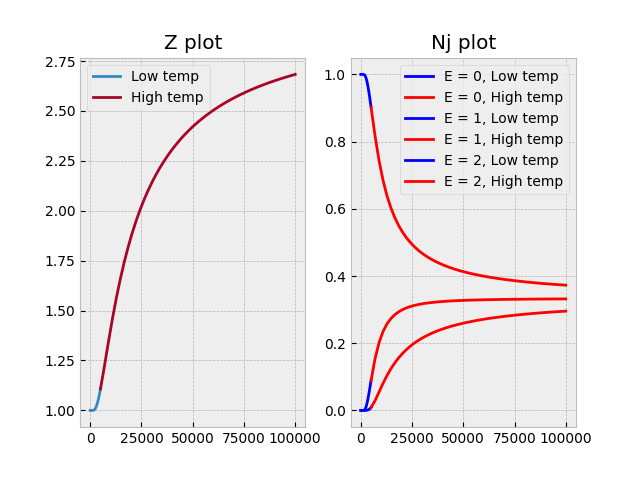

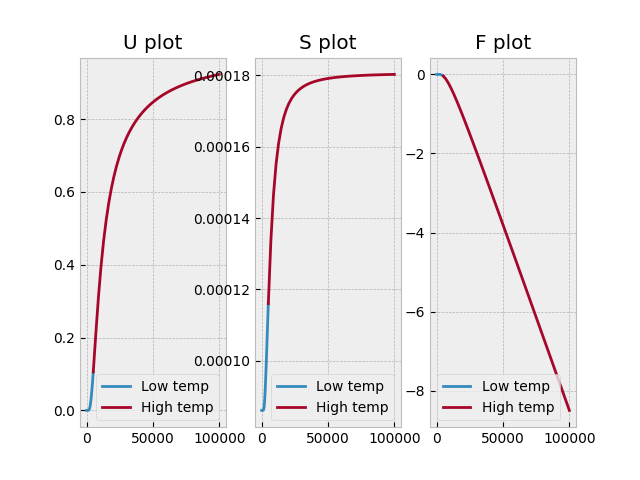

In [80]:
# Two level 0, epsilon
evals,g = np.array([0,1,2]),np.array([1,1,1])

Z,P,U,S,F = getZ(evals,g)

plotZP(Z,P)
plotUSF(U,S,F)
ax2.plot(T_spacehigh,np.ones(T_spacehigh.shape)*1/3)

[0.00000000e+00 7.39847979e-50 3.84667091e-25 6.66397079e-17
 8.77116360e-13 2.59807522e-10 1.15446669e-08 1.73512683e-07
 1.32447515e-06 6.43574710e-06 2.27953234e-05 6.41557474e-05
 1.51963277e-04 3.15242782e-04 5.89261787e-04 1.01342092e-03
 1.62887810e-03 2.47631028e-03 3.59405872e-03 5.01675952e-03
 6.77445807e-03 8.89214635e-03 1.13896359e-02 1.42816761e-02
 1.75782374e-02 2.12848932e-02 2.54032514e-02 2.99313988e-02
 3.48643378e-02 4.01943989e-02 4.59116231e-02 5.20041113e-02
 5.84583401e-02 6.52594467e-02 7.23914846e-02 7.98376529e-02
 8.75805024e-02 9.56021205e-02 1.03884297e-01 1.12408672e-01
 1.21156870e-01 1.30110616e-01 1.39251840e-01 1.48562769e-01
 1.58026010e-01 1.67624612e-01 1.77342130e-01 1.87162669e-01
 1.97070928e-01 2.07052225e-01]


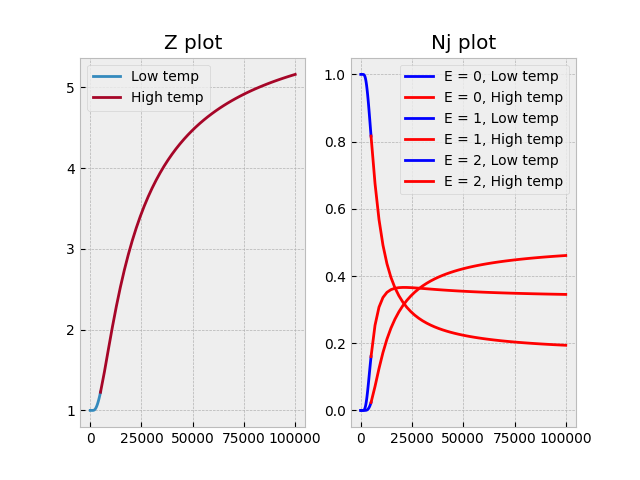

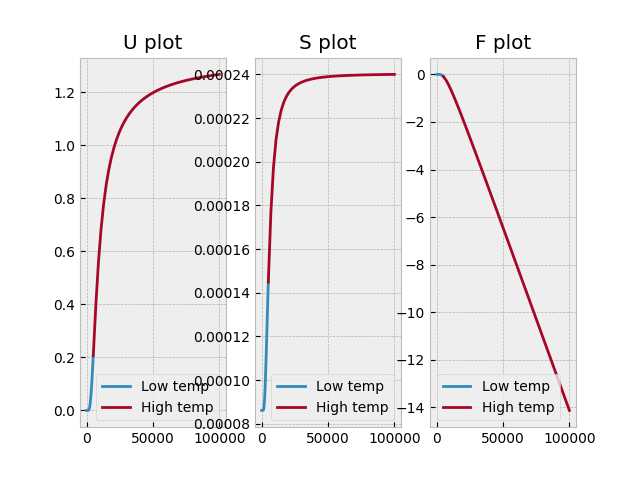

In [81]:
# Two level 0, epsilon
evals,g = np.array([0,1,2]),np.array([1,2,3])

Z,P,U,S,F = getZ(evals,g)

plotZP(Z,P)
plotUSF(U,S,F)

In [87]:
print((F(2e5)-F(2.01e5))/0.01e5)

0.0001541888270716534


[0.00000000e+00 9.24809974e-51 4.80833863e-26 8.32996348e-18
 1.09639545e-13 3.24759402e-11 1.44308342e-09 2.16890981e-08
 1.65560134e-07 8.04485861e-07 2.84963465e-06 8.02120478e-06
 1.90051509e-05 3.94472645e-05 7.38041570e-05 1.27110617e-04
 2.04727968e-04 3.12121810e-04 4.54694761e-04 6.37680078e-04
 8.66088934e-04 1.14469783e-03 1.47806126e-03 1.87053660e-03
 2.32631123e-03 2.84942524e-03 3.44378643e-03 4.11317601e-03
 4.86124576e-03 5.69150773e-03 6.60731858e-03 7.61186029e-03
 8.70811943e-03 9.89886626e-03 1.11866352e-02 1.25737078e-02
 1.40620979e-02 1.56535413e-02 1.73494882e-02 1.91510988e-02
 2.10592435e-02 2.30745051e-02 2.51971840e-02 2.74273070e-02
 2.97646365e-02 3.22086826e-02 3.47587167e-02 3.74137856e-02
 4.01727265e-02 4.30341832e-02]


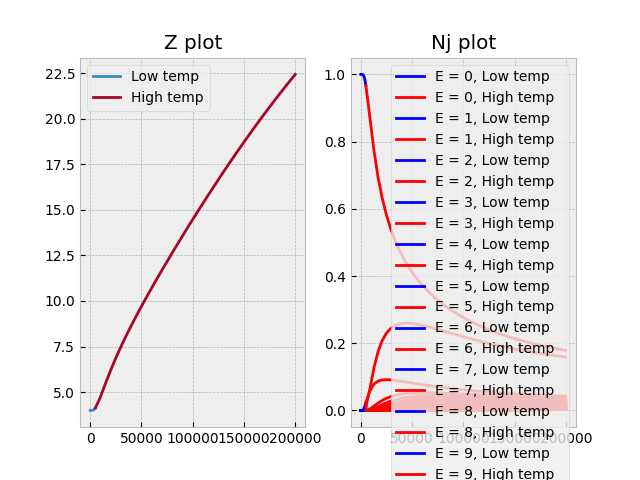

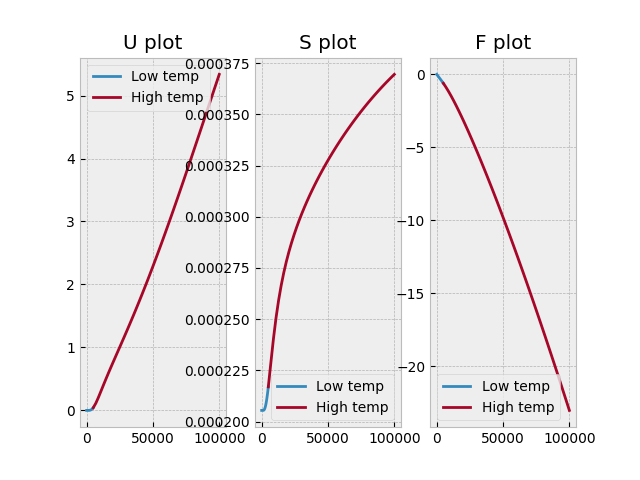

In [97]:
# Two level 0, epsilon
evals,g = np.arange(0,50),np.ones(50)
g[[0,2]] = 4

Z,P,U,S,F = getZ(evals,g)

plotZP(Z,P)
plotUSF(U,S,F)